# End-to-end `scivision` pipeline for a pretrained/prebuilt model for automatic coastal vegetation edge detection

This notebook demonstrates `scivision` to load `VEdge_Detector`, a pretrained model for the automated detection of coastal vegetation edges in remote sensing imagery. `VEdge_Detector` was implemented in python 3.7 using Tensorflow v2.2.
Further details of the `VEdge_Detector` can be found in [the original model repository](https://github.com/MartinSJRogers/VEdge_Detector).

The code of this notebook let `scivision` to fetch input data from:
https://raw.githubusercontent.com/acocac/VEdge_Detector/main/scivision.yml

and load the pretrained `VEdge_Detector` from:
https://github.com/acocac/VEdge_Detector

In [1]:
!pip -q install scivision

## Load scivision

In [2]:
from scivision.io import load_pretrained_model, load_dataset

## Load model

In [3]:
# Load model
scivision_yml = 'https://github.com/acocac/VEdge_Detector/.scivision-config.yaml'
model = load_pretrained_model(scivision_yml, allow_install=True)

Using TensorFlow backend.
2022-02-09 22:52:29.900658: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-02-09 22:52:29.927391: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc2d9415530 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-02-09 22:52:29.927412: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [4]:
# let's explore the model object
model

scivision.PretrainedModel( 
  module='vedge_detector', 
  model='vedge_detector', 
  source='https://github.com/acocac/VEdge_Detector.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "image: numpy.ndarray">)' 
)

## Load data

In [5]:
cat = load_dataset('https://github.com/acocac/VEdge_Detector')

In [6]:
dataset = cat.sample_image(sample_image='winterton').to_dask()

/Users/acoca/anaconda3/envs/vedge_scivision/lib/python3.7/site-packages/intake_xarray/image.py:337: FutureWarning: open_files is deprecated and will be removed in a future release. Please use fsspec.core.open_files instead.
  files = open_files(self.urlpath, **self.storage_options)
/Users/acoca/anaconda3/envs/vedge_scivision/lib/python3.7/site-packages/xarray/core/dataset.py:2178: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  category=FutureWarning,


## Prediction and Visualisation

/Users/acoca/anaconda3/envs/vedge_scivision/lib/python3.7/site-packages/skimage/_shared/utils.py:338: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


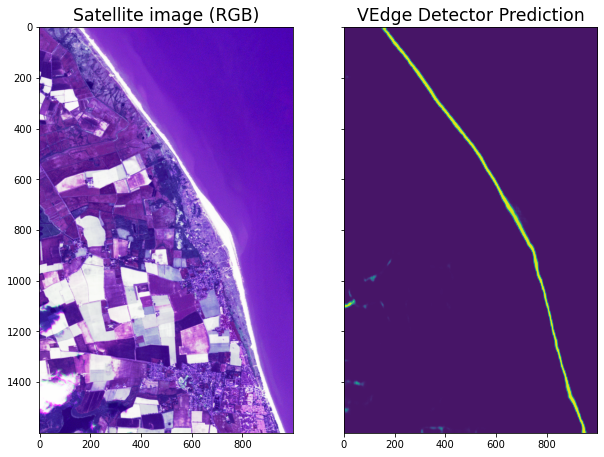

In [7]:
pred = model.predict(X=dataset,provider='Planet')